# Synthetic data generation with GAN

Generative Adversarial Networks (GANs) are a powerful framework for generating synthetic data. The core idea involves training two neural networks, a generator and a discriminator, in an adversarial manner. The generator network, denoted as G, takes a latent vector z as input and generates synthetic data samples x^ = G(z). The discriminator network, denoted as D, takes a data sample x as input and predicts the probability D(x) of it being real or generated. The objective of the generator is to generate synthetic samples that are indistinguishable from real samples, while the objective of the discriminator is to correctly classify real and generated samples. During training, the generator and discriminator networks are optimized alternately.

<img src="images/GAN.png" width="400"/>

In [22]:
%load_ext autoreload
%autoreload 2
from utils import *
from gan import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
engine_data = get_engine_data()
train_test_sample_size = 10000
df = engine_data.sample(train_test_sample_size)
df

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
6030,35.0046,0.8400,100.0,449.44,555.95,1370.36,1139.95,5.48,8.00,194.08,...,183.08,2388.48,8087.41,9.3494,0.02,335,2223,100.0,14.70,8.7679
34936,20.0056,0.7000,100.0,491.19,607.27,1483.67,1252.68,9.35,13.65,335.13,...,315.66,2388.12,8078.53,9.2064,0.02,364,2324,100.0,24.44,14.7336
53369,0.0012,0.0000,100.0,518.67,642.76,1583.06,1401.46,14.62,21.61,553.94,...,521.73,2388.07,8140.96,8.4685,0.03,392,2388,100.0,38.70,23.2662
6981,42.0033,0.8400,100.0,445.00,550.77,1364.67,1136.26,3.91,5.72,138.58,...,130.30,2389.06,8144.97,9.4244,0.02,332,2212,100.0,10.65,6.3963
52563,0.0005,0.0000,100.0,518.67,642.69,1594.86,1414.82,14.62,21.61,552.51,...,520.36,2388.14,8142.13,8.4302,0.03,394,2388,100.0,38.71,23.1851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27884,20.0071,0.7003,100.0,491.19,607.78,1479.10,1248.20,9.35,13.66,334.97,...,314.73,2388.11,8070.48,9.2249,0.02,366,2324,100.0,24.63,14.6682
8916,10.0019,0.2500,100.0,489.05,604.22,1494.10,1301.96,10.52,15.49,394.92,...,372.07,2388.00,8125.91,8.6173,0.03,368,2319,100.0,28.57,17.2599
1851,20.0051,0.7000,100.0,491.19,607.93,1482.71,1257.84,9.35,13.66,333.74,...,314.32,2388.11,8053.37,9.2411,0.03,365,2324,100.0,24.46,14.5583
43890,42.0029,0.8400,100.0,445.00,549.17,1348.56,1124.06,3.91,5.72,138.70,...,130.62,2388.22,8097.56,9.3479,0.02,330,2212,100.0,10.75,6.3666


In [4]:
# Set hyperparams
batch_size = 512
latent_dim = 256
num_epochs = 100
lr = 0.001

generator,min_val, max_val = train(df,batch_size,latent_dim,num_epochs,lr)

Epoch [1/100], D Loss: 1.5386, G Loss: 0.7507
Epoch [2/100], D Loss: 1.4145, G Loss: 1.2423
Epoch [3/100], D Loss: 0.9372, G Loss: 1.0985
Epoch [4/100], D Loss: 0.5951, G Loss: 1.3932
Epoch [5/100], D Loss: 1.2786, G Loss: 0.9131
Epoch [6/100], D Loss: 0.9760, G Loss: 1.3838
Epoch [7/100], D Loss: 0.9063, G Loss: 3.1755
Epoch [8/100], D Loss: 0.4249, G Loss: 3.4227
Epoch [9/100], D Loss: 0.9436, G Loss: 4.3185
Epoch [10/100], D Loss: 0.5373, G Loss: 1.7800
Epoch [11/100], D Loss: 1.0938, G Loss: 0.6255
Epoch [12/100], D Loss: 0.8271, G Loss: 1.0995
Epoch [13/100], D Loss: 1.4661, G Loss: 1.5947
Epoch [14/100], D Loss: 0.7613, G Loss: 3.3485
Epoch [15/100], D Loss: 0.5892, G Loss: 1.9975
Epoch [16/100], D Loss: 1.0921, G Loss: 0.6204
Epoch [17/100], D Loss: 0.8539, G Loss: 1.2893
Epoch [18/100], D Loss: 0.8748, G Loss: 1.7747
Epoch [19/100], D Loss: 1.6189, G Loss: 1.3887
Epoch [20/100], D Loss: 0.8972, G Loss: 1.2630
Epoch [21/100], D Loss: 2.3707, G Loss: 0.5495
Epoch [22/100], D Loss

In [5]:
%%time
# Generate synthetic data

sample_size = 100
z = torch.randn(sample_size, latent_dim)
synthetic_data = generator(z)
synthetic_data = inverse_normalize(synthetic_data,min_val,max_val).detach().numpy()
synthetic_df = pd.DataFrame(synthetic_data, columns=reqd_cols)
synthetic_df

CPU times: user 1.73 ms, sys: 0 ns, total: 1.73 ms
Wall time: 1.36 ms


,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,-314.773773,281.358002,-285.991913,658.286133,887.267029,1591.861450,1036.246460,-96.278748,19.374235,153.801346,...,446.440155,2389.797607,7907.394043,-56.104828,-102.006287,170.688309,2173.989990,157.903687,296.095825,-276.638550
1,-547.226257,13.701495,-421.964508,564.699890,605.068909,1520.864014,959.663635,-84.135872,-88.580460,135.460159,...,381.525330,2195.421875,7931.301270,-145.527069,-178.828049,8.380595,2056.302979,227.028793,15.532215,-257.418335
2,-396.801331,-25.640499,-450.875153,555.873718,784.709106,1491.680176,1031.130737,-55.128773,31.168558,142.587402,...,450.187073,2234.377930,7822.753906,-123.226868,-111.435829,195.206436,1983.124390,-24.365215,198.992279,-261.214569
3,-342.382263,-297.770905,-615.535339,373.735809,277.852448,1408.285767,962.666870,-407.009644,-162.121658,-170.211792,...,239.733963,2334.090088,7909.234375,-114.618835,-626.201782,173.609909,1631.333618,-157.814087,209.657089,-588.246887
4,-558.615540,-96.984070,-546.997681,555.964417,708.492432,1459.157959,919.576843,-122.928734,-42.611042,64.325127,...,298.011475,2326.620605,7895.913574,-219.480942,-243.545837,124.955101,1932.572754,48.515602,102.238380,-331.923523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-190.092422,275.840607,-268.014648,804.972534,954.454529,1554.699097,1160.282227,108.605217,129.233902,157.830521,...,374.257812,2497.304688,7858.349121,-28.192713,-222.881531,162.690247,2111.756104,229.021194,354.472534,-222.936874
96,-299.507629,163.204590,-310.957245,561.608398,701.609619,1618.050537,1104.853149,-90.131409,36.207767,122.227242,...,282.859619,2387.420166,7984.895020,-14.784966,-297.929291,124.239090,2034.904053,221.873413,231.548737,-257.955933
97,-758.116150,-226.099609,-590.129395,141.241425,448.794250,1214.754395,830.555237,-356.745270,-201.134827,-88.625946,...,150.456680,2028.890991,8069.291016,-421.453735,-379.643372,-186.103790,1828.148804,-203.399323,-40.862251,-622.275635
98,-567.829712,43.879200,-446.788422,492.076080,908.202087,1580.817383,829.247070,-71.038864,-27.895128,133.664246,...,275.344910,2329.687744,8040.219727,-322.147064,-244.173340,263.948456,2212.270996,19.358068,215.442459,-287.579041


In [30]:
from pathlib import Path
metrics_dir = 'metrics'
algo_name = 'gan'
original_df_file = f'{metrics_dir}/original_df.csv'
synthetic_df_file = f'{metrics_dir}/{algo_name}_df.csv'

if Path(original_df_file).is_file():
    original_df = pd.read_csv(original_df_file)
else:
    original_df = engine_data.sample(len(synthetic_df))
    original_df = original_df.reset_index(inplace=False,drop=True)
    original_df.to_csv(original_df_file, index=False,header=True) 

synthetic_df.to_csv(synthetic_df_file, index=False,header=True) 
original_df

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,34.9983,0.8400,100.0,449.44,555.78,1363.97,1125.39,5.48,8.00,194.72,...,182.94,2388.13,8073.91,9.3152,0.02,333,2223,100.00,14.72,8.8547
1,24.9984,0.6200,60.0,462.54,537.01,1256.09,1045.64,7.05,9.03,175.57,...,165.18,2028.40,7886.30,10.9136,0.02,306,1915,84.93,14.55,8.5935
2,42.0071,0.8401,100.0,445.00,549.81,1352.27,1124.99,3.91,5.71,138.57,...,130.77,2387.89,8080.70,9.3821,0.02,331,2212,100.00,10.62,6.4156
3,0.0020,0.0000,100.0,518.67,642.81,1589.90,1407.62,14.62,21.61,553.10,...,521.52,2388.13,8138.29,8.4215,0.03,393,2388,100.00,38.97,23.3654
4,9.9989,0.2517,100.0,489.05,604.29,1496.64,1304.30,10.52,15.49,393.91,...,371.99,2388.10,8139.17,8.6337,0.03,368,2319,100.00,28.62,17.0607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.0075,0.2507,100.0,489.05,604.94,1499.84,1310.79,10.52,15.49,394.34,...,371.37,2388.16,8132.50,8.6452,0.03,369,2319,100.00,28.54,17.0885
96,35.0002,0.8404,100.0,449.44,555.52,1363.91,1129.15,5.48,8.00,195.68,...,183.46,2388.07,8066.44,9.2779,0.02,332,2223,100.00,14.87,8.9074
97,35.0048,0.8400,100.0,449.44,557.03,1376.97,1155.05,5.48,8.01,194.01,...,182.99,2389.65,8143.37,9.4200,0.02,338,2223,100.00,14.67,8.8234
98,10.0074,0.2517,100.0,489.05,604.93,1509.62,1315.22,10.52,15.49,394.45,...,371.01,2388.19,8152.99,8.6958,0.03,370,2319,100.00,28.68,17.1613


In [23]:
real_stats_df, synthetic_stats_df, comparison_stats_df = compute_stats(original_df,synthetic_df)
print("Original data stat")
display(real_stats_df)

print("\nSynthetic stat")
display(synthetic_stats_df)

print("\nComparison:")
display(comparison_stats_df)

Original data stat


,Min,Max,Mean,Std
setting1,0.0001,42.0079,22.163327,15.039277
setting2,0.0000,0.8418,0.535724,0.322304
setting3,60.0000,100.0000,94.000000,14.282857
s1,445.0000,518.6700,476.576500,27.132639
s2,536.5000,643.5700,584.306200,38.859589
s3,1256.4800,1605.6600,1431.476900,110.784123
s4,1039.2800,1424.4500,1219.445900,124.334410
s5,3.9100,14.6200,8.504900,3.743725
s6,5.7100,21.6100,12.300400,5.650154
s7,137.7800,554.8100,300.713400,152.569610



Synthetic stat


,Min,Max,Mean,Std
setting1,-1517.077393,27.360790,-481.490631,222.666428
setting2,-1408.508911,463.603333,-24.141535,276.730255
setting3,-1475.654419,-166.946579,-558.689392,229.673447
s1,-686.918884,949.851013,501.158051,247.654846
s2,-1121.678955,1045.611328,587.130249,316.954163
s3,915.238892,1774.957642,1439.561523,166.827545
s4,465.766968,1263.566772,960.006348,144.406754
s5,-1481.285034,117.647293,-230.382172,248.104095
s6,-1305.240967,385.837860,-132.323929,239.275726
s7,-1093.364014,443.655853,11.055311,219.983749



Comparison:


,KLD Mean,WD Mean
Comparison,146.187996,257.247241


In [7]:
kl_divs = kld(original_df,synthetic_df)
kl_divs

[{'setting1': 661.5654907226562},
 {'setting2': 371492.3125},
 {'setting3': 1159.696044921875},
 {'s1': 39.3512077331543},
 {'s2': 30.667192459106445},
 {'s3': 0.2270958423614502},
 {'s4': 2.1800408363342285},
 {'s5': 4206.79345703125},
 {'s6': 1216.767822265625},
 {'s7': 1.9577324390411377},
 {'s8': 0.13157686591148376},
 {'s9': 0.1792941391468048},
 {'s10': 6636771.0},
 {'s11': 15592.83984375},
 {'s12': 0.16085293889045715},
 {'s13': 0.014692168682813644},
 {'s14': 1.148384690284729},
 {'s15': 76959.703125},
 {'s16': 4152911872.0},
 {'s17': 65.291259765625},
 {'s18': 2.056267261505127},
 {'s19': 682.4238891601562},
 {'s20': 295.69488525390625},
 {'s21': 3109.166015625}]

In [8]:
#provides statstic and p value for each field
ks_test(original_df,synthetic_df)

[{'setting1': (0.99, 4.417521386399011e-57)},
 {'setting2': (0.55, 3.0406585087050305e-14)},
 {'setting3': (1.0, 2.2087606931995054e-59)},
 {'s1': (0.53, 3.35710076793659e-13)},
 {'s2': (0.48, 8.448372017533173e-11)},
 {'s3': (0.16, 0.1548386665118475)},
 {'s4': (0.72, 2.6766397956445386e-25)},
 {'s5': (0.91, 2.596277269141426e-44)},
 {'s6': (0.69, 4.9622936758674526e-23)},
 {'s7': (0.68, 2.6207113475674983e-22)},
 {'s8': (0.48, 8.448372017533173e-11)},
 {'s9': (0.45, 1.7047967801006258e-09)},
 {'s10': (0.99, 4.417521386399011e-57)},
 {'s11': (1.0, 2.2087606931995054e-59)},
 {'s12': (0.34, 1.605714367105695e-05)},
 {'s13': (0.61, 1.1250455638865439e-17)},
 {'s14': (0.59, 1.7671447393730104e-16)},
 {'s15': (0.9, 4.958889584060123e-43)},
 {'s16': (0.95, 5.600644140061753e-50)},
 {'s17': (0.96, 1.4287357500157535e-51)},
 {'s18': (0.81, 3.93815390175582e-33)},
 {'s19': (0.62, 2.7084430241713094e-18)},
 {'s20': (0.61, 1.1250455638865439e-17)},
 {'s21': (0.98, 4.395433779467016e-55)}]

In [9]:
kld_mean(original_df,synthetic_df)

146.18799601576816

In [10]:
wd_mean(original_df,synthetic_df)

257.24724100728184

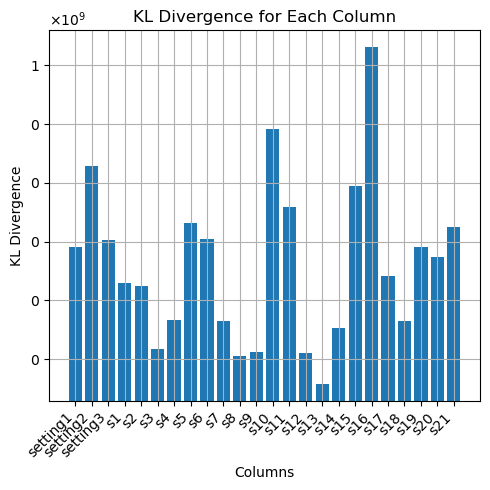

In [12]:
show_n_save(algo_name,'kld',original_df, synthetic_df)

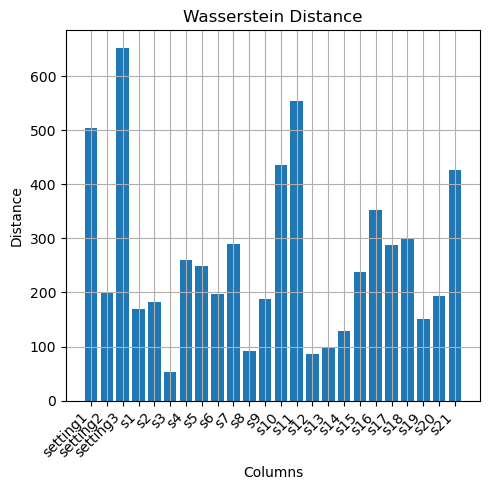

In [13]:
show_n_save(algo_name,'wd',original_df, synthetic_df)

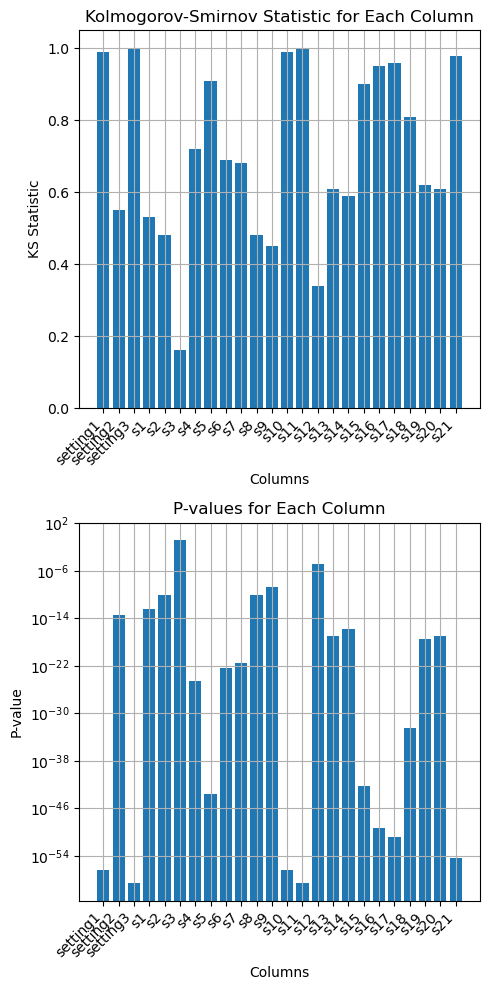

In [14]:
#statistic bar chart, lower bars are better
#p-value bar chart, higher bars are better
show_n_save(algo_name,'ks_test',original_df, synthetic_df)

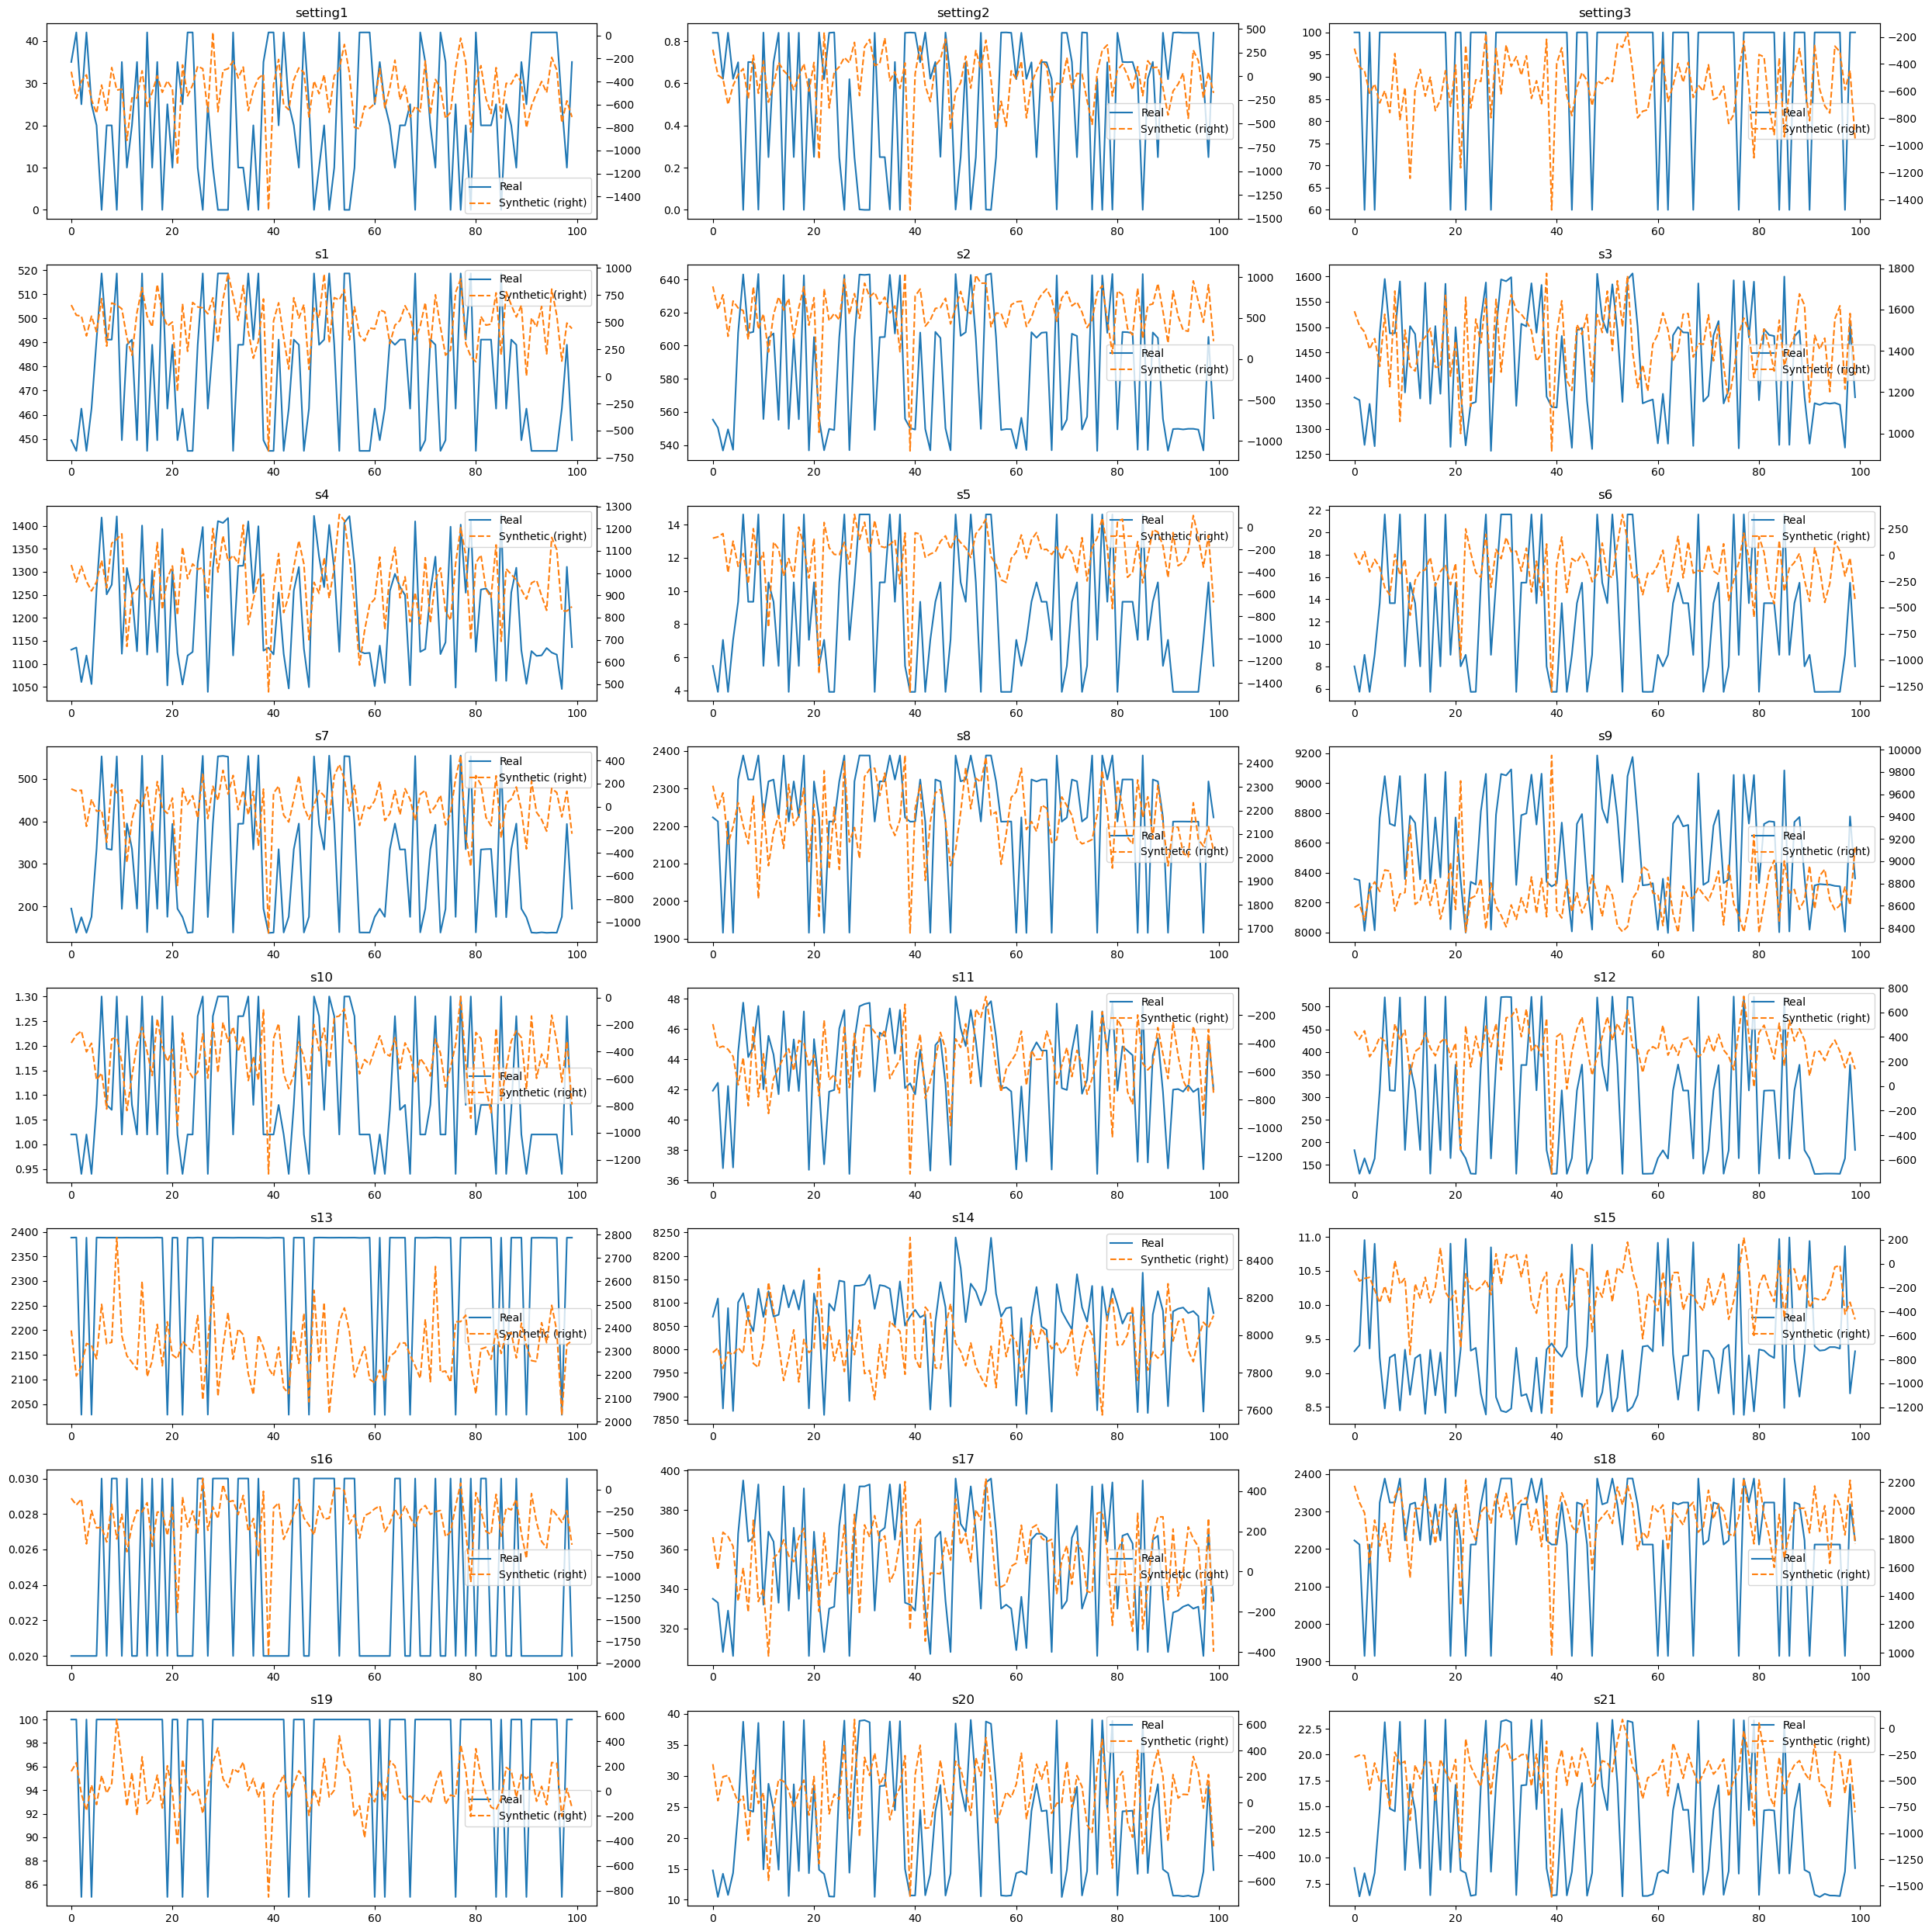

In [15]:
show_n_save(algo_name,'distribs',original_df, synthetic_df)

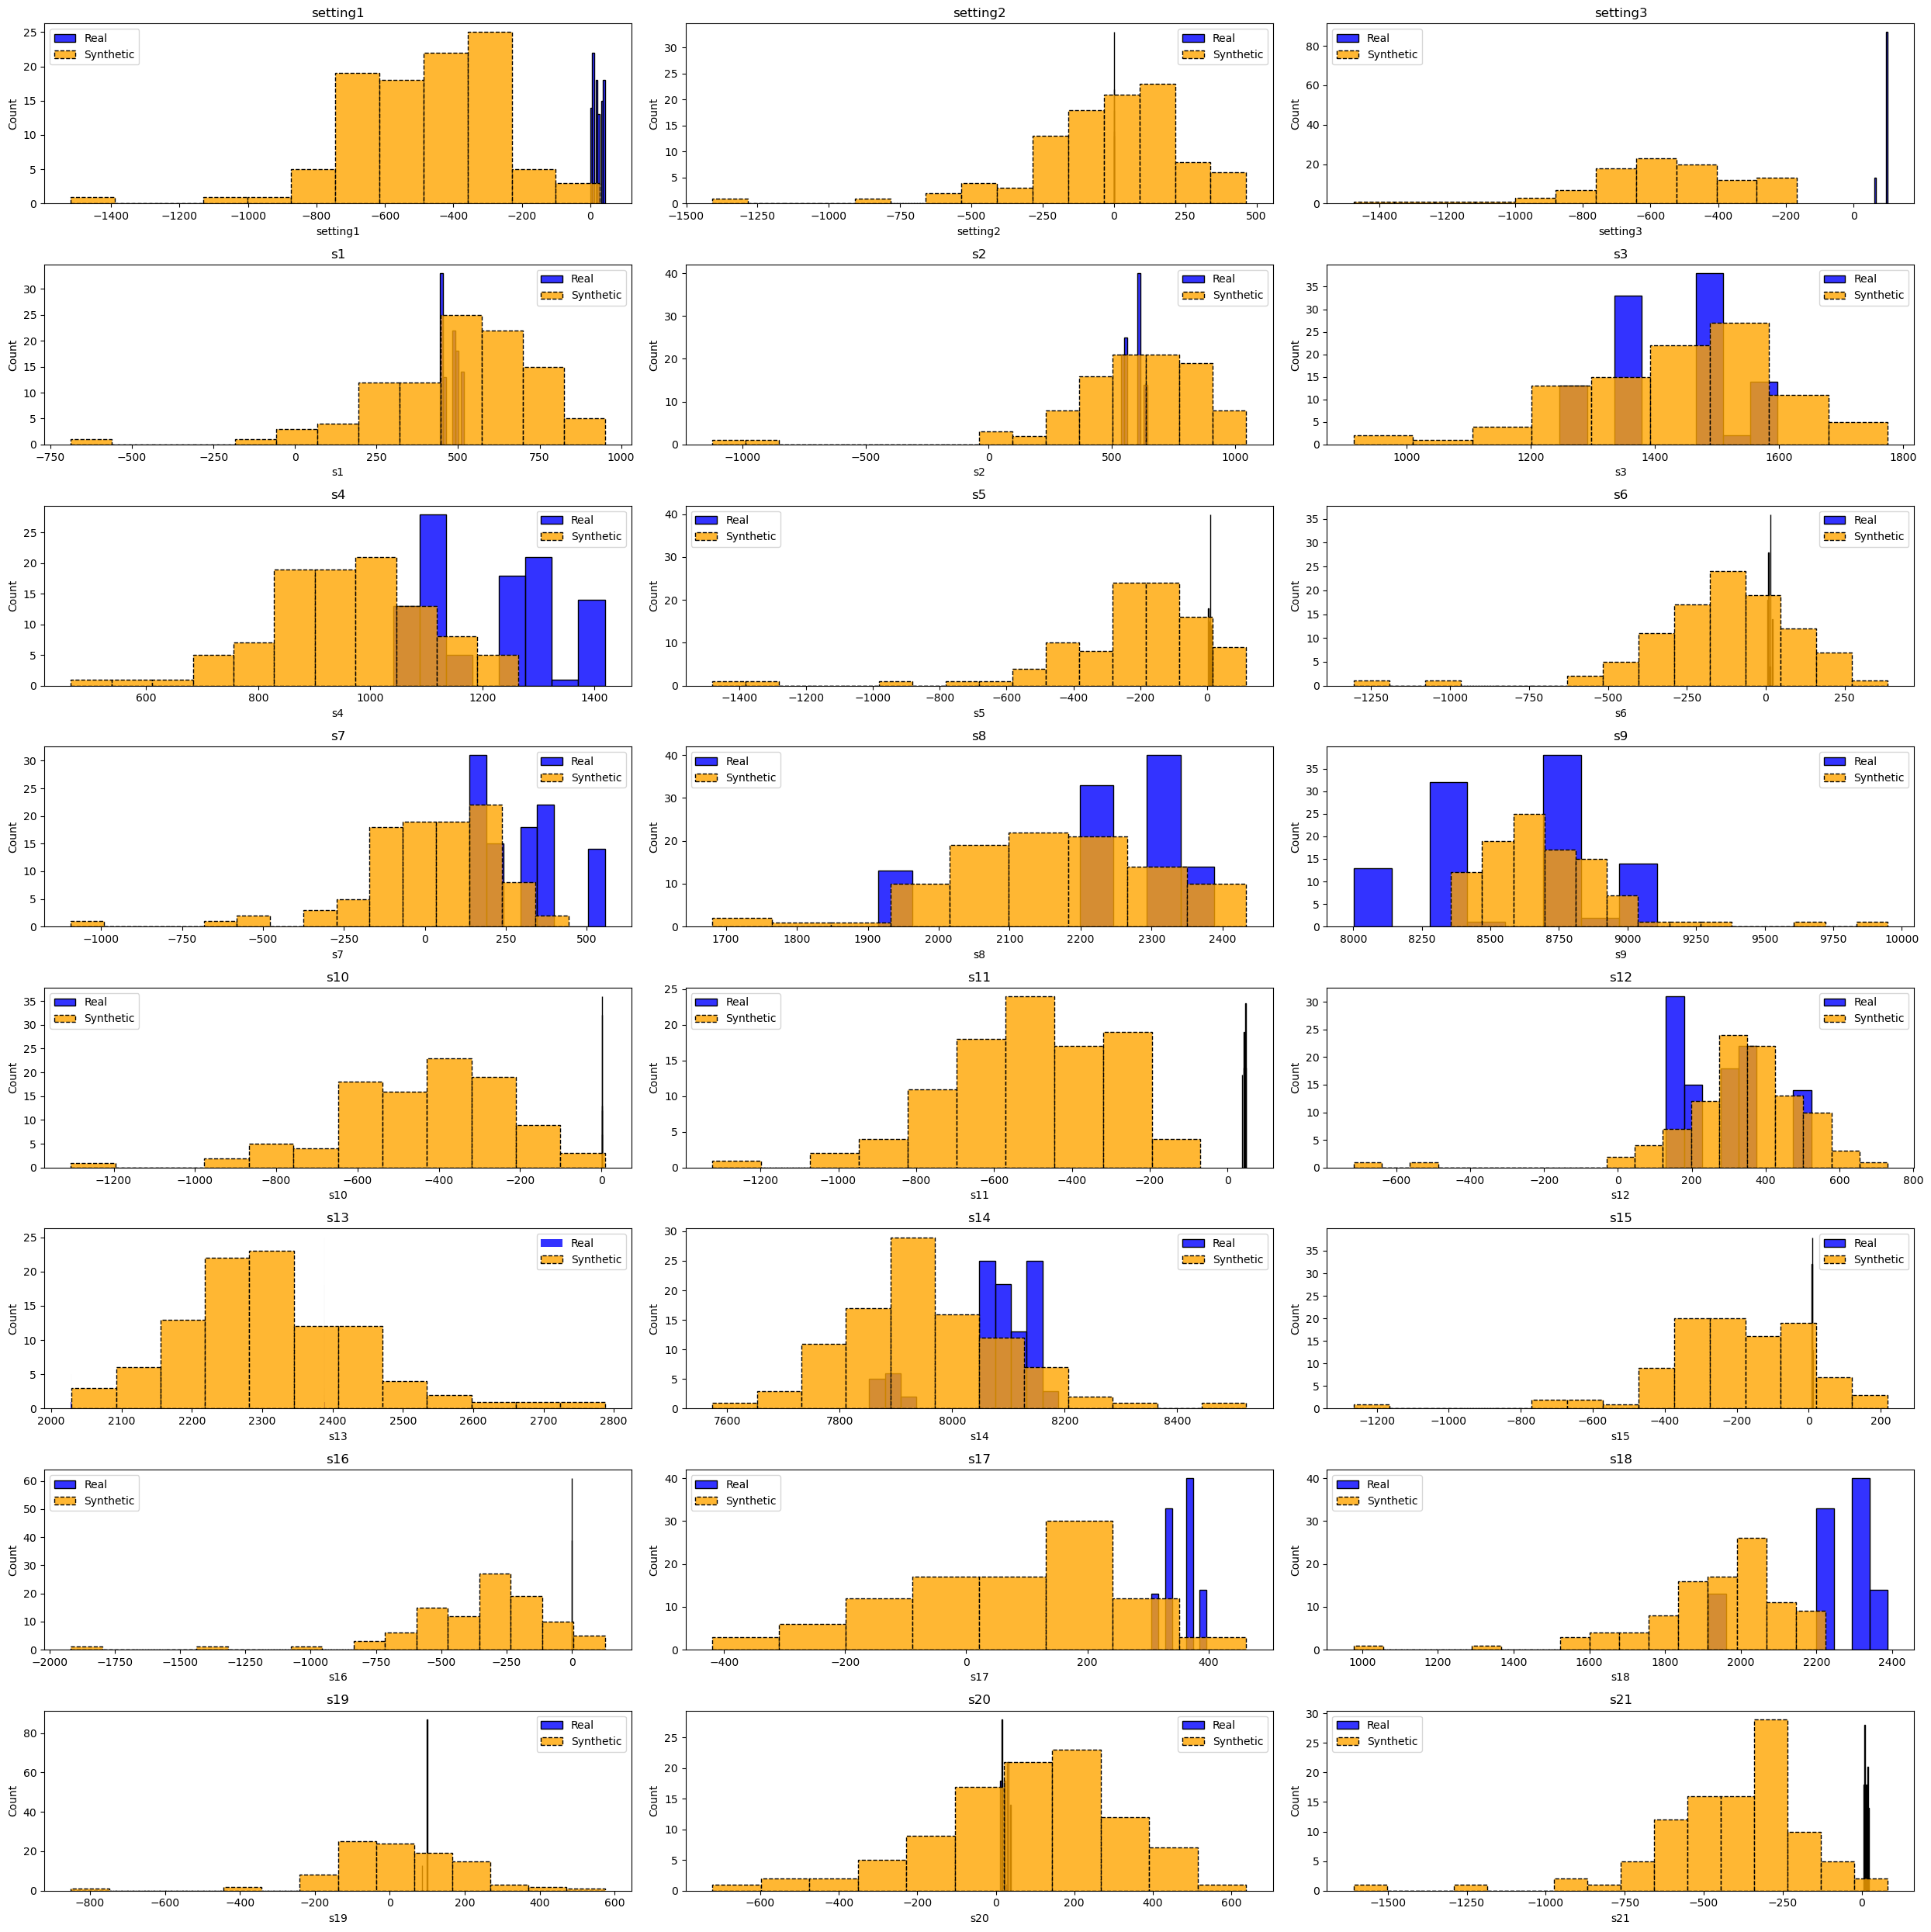

In [31]:
show_n_save(algo_name,'hist',original_df, synthetic_df)

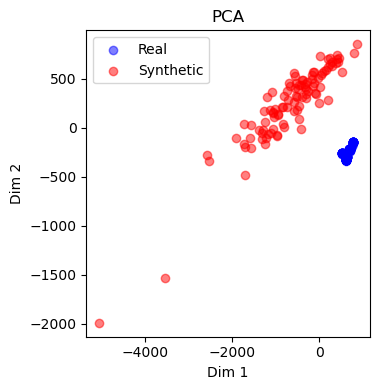

In [17]:
show_n_save(algo_name,'pca',original_df, synthetic_df)

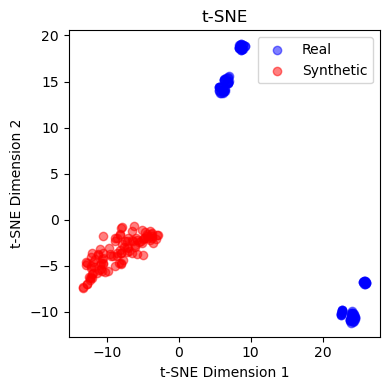

In [18]:
show_n_save(algo_name,'tsne',original_df, synthetic_df)